# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Assign base url for API's call

base_url = "http://api.openweathermap.org/data/2.5/weather?q="

In [4]:
#Set empty lists to hold cities data

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country_code = []

In [5]:
# Loop trough the list of cities and perform a request on each

print(f"""
Beginning Data Retrieval
----------------------------""")

for i, city in enumerate(cities):
    query_url = f"{base_url}{city}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    #print(json.dumps(response, indent = 4))
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country_code.append(response["sys"]["country"])
        print(f"Processing Record: {i} : {city}")
    except:
        print(f"City not found. Skipping...")
        
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        country_code.append(None)
        


Beginning Data Retrieval
----------------------------
Processing Record: 0 : jamestown
Processing Record: 1 : ignacio zaragoza
Processing Record: 2 : kodiak
Processing Record: 3 : umm lajj
Processing Record: 4 : wuan
Processing Record: 5 : korem
Processing Record: 6 : rikitea
Processing Record: 7 : french harbor
Processing Record: 8 : saint-philippe
Processing Record: 9 : walvis bay
Processing Record: 10 : pevek
Processing Record: 11 : bethel
Processing Record: 12 : qasigiannguit
Processing Record: 13 : thompson
City not found. Skipping...
Processing Record: 15 : pitimbu
Processing Record: 16 : port elizabeth
Processing Record: 17 : upernavik
Processing Record: 18 : olafsvik
Processing Record: 19 : cabo san lucas
Processing Record: 20 : laramie
Processing Record: 21 : camacha
Processing Record: 22 : qaanaaq
Processing Record: 23 : provideniya
Processing Record: 24 : hobart
Processing Record: 25 : chokurdakh
Processing Record: 26 : saint george
Processing Record: 27 : koslan
Processing

Processing Record: 243 : amersfoort
Processing Record: 244 : petropavlovsk-kamchatskiy
Processing Record: 245 : angoche
Processing Record: 246 : hami
Processing Record: 247 : mocuba
Processing Record: 248 : areia branca
Processing Record: 249 : uttarkashi
Processing Record: 250 : srednekolymsk
Processing Record: 251 : ukiah
Processing Record: 252 : hasaki
Processing Record: 253 : rio grande
Processing Record: 254 : baykit
Processing Record: 255 : amurzet
Processing Record: 256 : iqaluit
City not found. Skipping...
Processing Record: 258 : saint-leu
City not found. Skipping...
Processing Record: 260 : russell
Processing Record: 261 : luangwa
Processing Record: 262 : grajau
Processing Record: 263 : ucluelet
Processing Record: 264 : makubetsu
Processing Record: 265 : astana
City not found. Skipping...
City not found. Skipping...
Processing Record: 268 : havelock
Processing Record: 269 : egvekinot
Processing Record: 270 : mar del plata
Processing Record: 271 : palaikastron
Processing Recor

Processing Record: 484 : toora-khem
Processing Record: 485 : pacific grove
Processing Record: 486 : inirida
Processing Record: 487 : saint stephen
Processing Record: 488 : balkanabat
Processing Record: 489 : manicore
Processing Record: 490 : balaipungut
Processing Record: 491 : ardakan
Processing Record: 492 : las choapas
Processing Record: 493 : shache
Processing Record: 494 : bekasi
Processing Record: 495 : keskin
Processing Record: 496 : progreso
Processing Record: 497 : ocala
City not found. Skipping...
Processing Record: 499 : mucurapo
Processing Record: 500 : karpogory
Processing Record: 501 : atambua
Processing Record: 502 : ivanteyevka
Processing Record: 503 : nyrob
City not found. Skipping...
Processing Record: 505 : svarstad
City not found. Skipping...
Processing Record: 507 : ajaccio
Processing Record: 508 : bambanglipuro
Processing Record: 509 : kirensk
Processing Record: 510 : cap-aux-meules
Processing Record: 511 : roald
Processing Record: 512 : ulaanbaatar
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame({
        "City": cities,
        "Lat" : lat,
        "Lng" : lng,
        "Max Temp" : max_temp,
        "Humidity" : humidity,
        "Cloudiness" : cloudiness,
        "Wind Speed" : wind_speed,
        "Country Code" : country_code
                          })

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Code
0,jamestown,42.0970,-79.2353,268.15,93.0,90.0,2.57,US
1,ignacio zaragoza,28.3833,-107.2167,279.82,45.0,45.0,3.58,MX
2,kodiak,57.7900,-152.4072,275.19,94.0,100.0,14.17,US
3,umm lajj,25.0213,37.2685,297.17,53.0,0.0,0.58,SA
4,wuan,31.6836,112.0044,294.42,37.0,0.0,1.42,CN


In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,22.027642,17.492463,281.781191,74.909747,52.243682,3.596715
std,33.072327,88.534525,17.648214,18.692694,40.336740,2.691935
min,-54.800000,-179.166700,238.120000,1.000000,0.000000,0.070000
25%,-5.489050,-61.475050,268.812500,67.000000,1.250000,1.540000
50%,28.520900,24.545750,287.095000,80.000000,57.500000,3.000000
75%,48.325075,91.944600,296.297500,88.000000,90.000000,4.872500
max,78.218600,178.416700,308.150000,100.000000,100.000000,19.550000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_over_100 = weather_df.loc[weather_df["Humidity"] > 100]
humidity_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Code


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

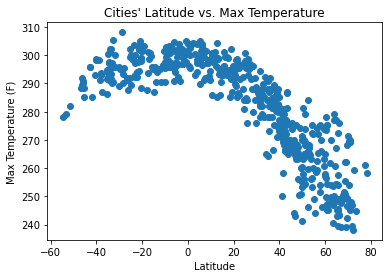

In [27]:
#Scatter Plot for Lat vs Max Temp

x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.title("Cities' Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

- It seems that Latitude and Maximum Temperature of a City has a negative correlation from the Latitude 0 to the other higher latitudes, this means that from Latitude 0, the higher the Latitude of a city, it would be expected that the Maximum Tempereature will be lower. The behavior of the cities with negative latitudes is peculiar, their temperature is higher as their latitudes get close to the Latitude 0.

In [28]:
#Save the plot
plt.savefig("Images/Lat_vs_Temp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

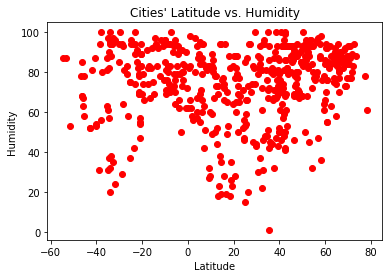

In [25]:
#Scatter Plot for Lat vs Humidity

x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.scatter(x_values, y_values, color = "r")
plt.title("Cities' Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

- From the scatter plot above, it can be assumed that there is no relation between cities' latitude and humidity.

In [26]:
#Save the plot
plt.savefig("Images/Lat_vs_Hum.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

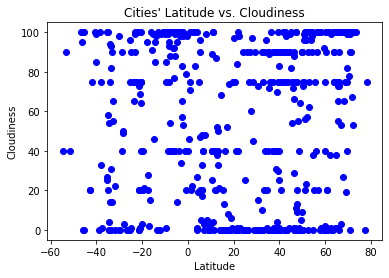

In [29]:
#Scatter Plot for Lat vs Humidity

x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values, y_values, color = "b")
plt.title("Cities' Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

- Cities' Latitude vs Cloudiness scatterplot shows that it does not matter the latitude of a city, the cloudiness can be expected to behavior at any level.

In [30]:
#Save the plot
plt.savefig("Images/Lat_vs_Cloud.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

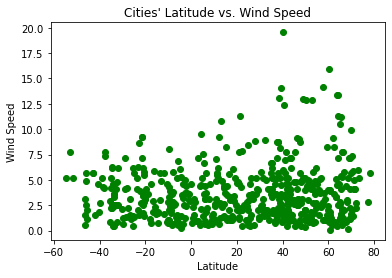

In [31]:
#Scatter Plot for Lat vs Humidity

x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values, y_values, color = "g")
plt.title("Cities' Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

- Even when relationship between Latitude and Wind Speed does not seem to be highly strong, it is a slightly behavior in cities with a higher latitude, where the wind speed is higher too, we can see this specially in cities with a latitude above 40 degrees.

In [32]:
#Save the plot
plt.savefig("Images/Lat_vs_Wind.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression